In [2]:
from pandas_datareader import data
import csv
import pandas as pd
import pandas_datareader as web
import sys
import io
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))

from pandas.plotting import register_matplotlib_converters

 
#

In [3]:
# We will look at stock prices, starting at March 1, 2019
start = datetime.datetime(2019,3,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
 
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-01,175.149994,172.889999,174.279999,174.970001,25886200,174.970001
2019-03-04,177.750000,173.970001,175.690002,175.850006,27436200,175.850006
2019-03-05,176.000000,174.539993,175.940002,175.529999,19737400,175.529999
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400,174.520004
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400,172.500000
2019-03-08,173.070007,169.500000,170.320007,172.910004,23999400,172.910004
2019-03-11,179.119995,175.350006,175.490005,178.899994,32011000,178.899994
2019-03-12,182.669998,179.369995,180.000000,180.910004,32467600,180.910004
2019-03-13,183.300003,180.919998,182.250000,181.710007,31032500,181.710007


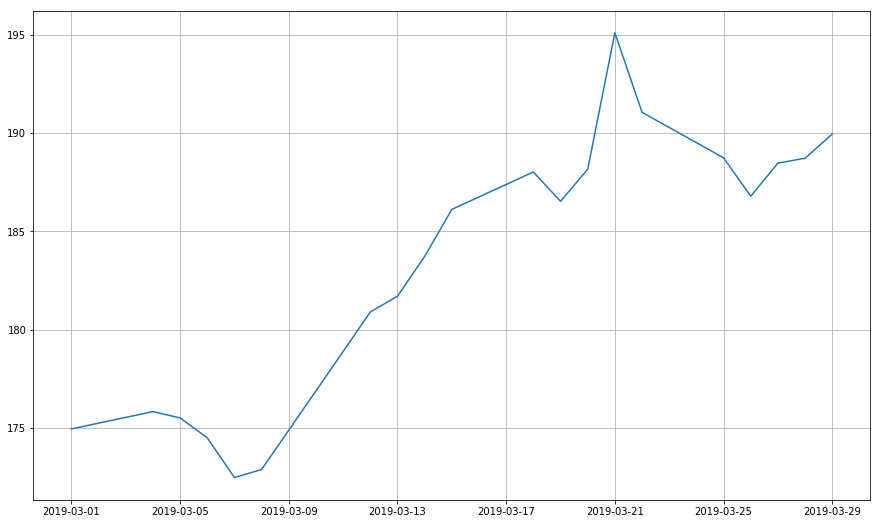

In [4]:
apple.to_csv('Apple.csv',index=False)
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(apple.index,apple.Close)

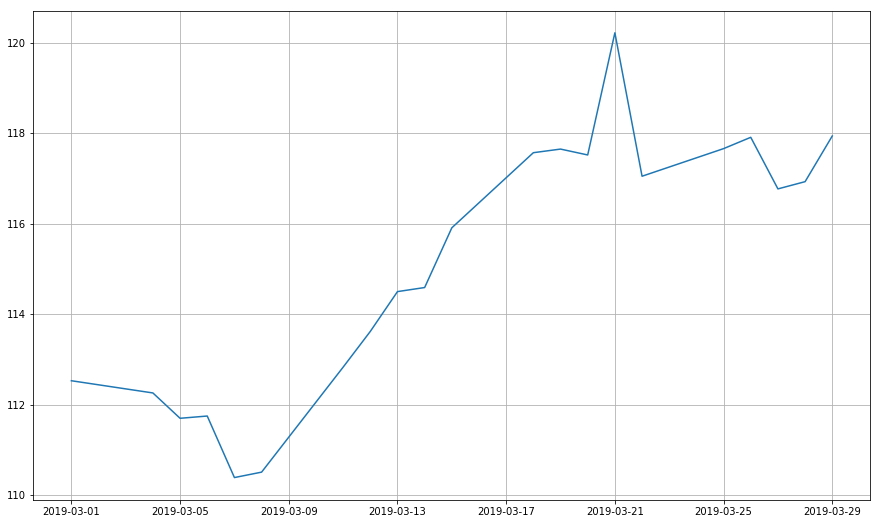

In [5]:
# Let's get Microsoft stock data; The ticker symbol is MSFT
Microsoft = web.DataReader("MSFT", "yahoo", start, end)
 
Microsoft
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Microsoft.index,Microsoft.Close)

In [11]:
Microsoft.to_csv('Microsoft.csv',index=False)

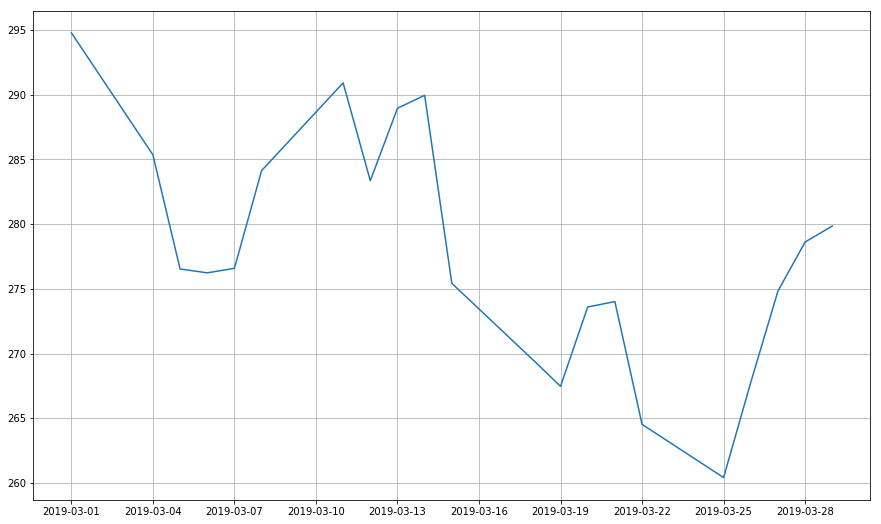

In [12]:
# Let's get Tesla stock data; The ticker symbol is TSLA
Tesla= web.DataReader("TSLA", "yahoo", start, end)
 
Tesla
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(Tesla.index,Tesla.Close)

In [13]:
Tesla.to_csv('Tesla.csv',index=False)

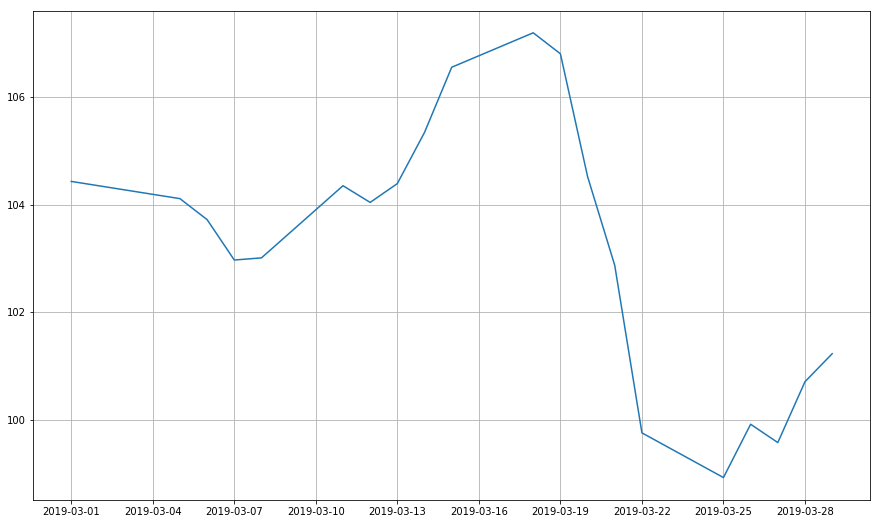

In [15]:
# Let's get JP Morgan stock data; The ticker symbol is JPM
JPMorgan = web.DataReader("JPM", "yahoo", start, end)
 
JPMorgan
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(JPMorgan.index,JPMorgan.Close)

In [16]:
JPMorgan.to_csv('JPMorgan.csv',index=False)

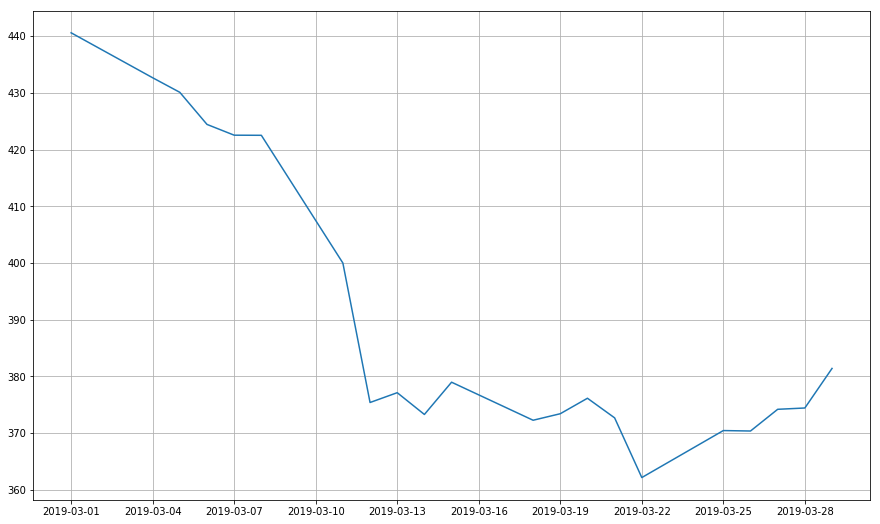

In [17]:
# Let's get Boeing stock data; The ticker symbol is BA
BA = web.DataReader("BA", "yahoo", start, end)
 
BA
plt.figure(figsize=(15,9))
plt.grid(True, axis='both')
plt.plot(BA.index, BA.Close)


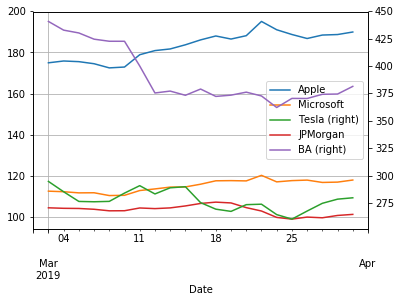

In [21]:
stock_commbine_close = pd.DataFrame()
stock_commbine_close['Apple'] = apple.Close
stock_commbine_close['Microsoft'] = Microsoft.Close
stock_commbine_close['Tesla'] = Tesla.Close
stock_commbine_close['JPMorgan'] = JPMorgan.Close
stock_commbine_close['BA'] = BA.Close
stock_commbine_close.to_csv()
stock_commbine_close

#stock_commbine_close.plot(grid=True)
stock_commbine_close.plot(secondary_y = ['BA', 'Tesla'], grid = True)

In [11]:
BA.to_csv('Boeing.csv',index=False)

In [12]:
close = BA['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start, end=end, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [13]:
print(all_weekdays)

DatetimeIndex(['2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28'],
              dtype='datetime64[ns]', freq='B')


In [14]:
close.head(10)

2019-03-01    440.619995
2019-03-04    432.690002
2019-03-05    430.119995
2019-03-06    424.459991
2019-03-07    422.559998
2019-03-08    422.540009
2019-03-11    400.010010
2019-03-12    375.410004
2019-03-13    377.140015
2019-03-14    373.299988
Freq: B, Name: Close, dtype: float64

In [15]:
close.describe()

count     20.000000
mean     391.203500
std       26.420309
min      362.170013
25%      373.149994
50%      375.785004
75%      422.545006
max      440.619995
Name: Close, dtype: float64